# Import Necessary Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [6]:
data=pd.read_csv("E:\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# For first five data

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# For last five data

In [12]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Information about the dataset

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Statistical Analysis

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Checking for missing values

In [23]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Select relevant features

In [30]:
x=data.iloc[:,[2,3,4]].values  # Age , Annual Income , Spending Score

# Encode categorical variables (e.g., Gender) into numeric values

In [70]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male: 1, Female: 0

# Standardize the data

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Determine the optimal number of clusters using the Elbow Method

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph

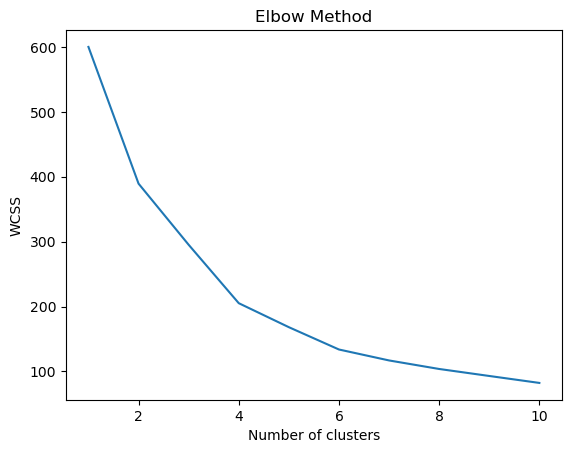

In [47]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters

In [50]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

 # Add the cluster labels to the original dataset

In [53]:
data['Cluster'] = y_kmeans

# Visualize the clusters

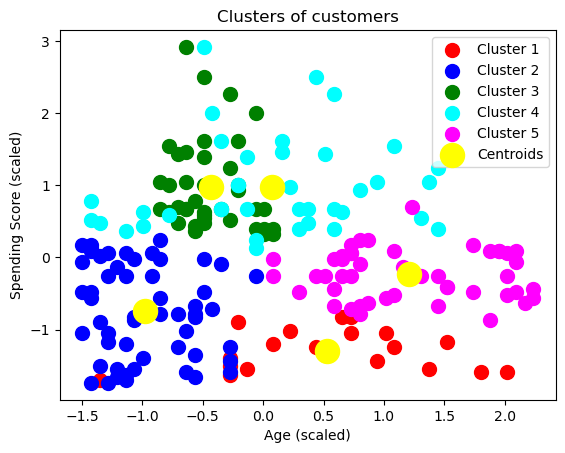

In [58]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3, 0], x_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x_scaled[y_kmeans == 4, 0], x_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

# Interpret the clusters

In [74]:
print(data.groupby('Cluster').mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         24.100000  0.400000  46.250000           26.750000   
1         55.648148  0.407407  25.185185           41.092593   
2        161.025000  0.450000  32.875000           86.100000   
3        159.743590  0.512821  39.871795           86.102564   
4         83.872340  0.425532  55.638298           54.382979   

         Spending Score (1-100)  
Cluster                          
0                     18.350000  
1                     62.240741  
2                     81.525000  
3                     19.358974  
4                     48.851064  


# Formulate marketing strategies based on the clusters

In [77]:
for cluster in range(5):
    print(f"\nCluster {cluster + 1} Characteristics:")
    print(data[data['Cluster'] == cluster].mean())
    if data[data['Cluster'] == cluster]['Spending Score (1-100)'].mean() > data['Spending Score (1-100)'].mean():
        print("Target with high-value offers and premium products.")
    if data[data['Cluster'] == cluster]['Annual Income (k$)'].mean() > data['Annual Income (k$)'].mean():
        print("Target with luxury items and exclusive deals.")
    if data[data['Cluster'] == cluster]['Age'].mean() < data['Age'].mean():
        print("Target with trendy and youthful products.")
    if data[data['Cluster'] == cluster]['Gender'].mean() == 0:  # Female
        print("Target with female-oriented products.")
    else:
        print("Target with male-oriented products.")


Cluster 1 Characteristics:
CustomerID                24.10
Gender                     0.40
Age                       46.25
Annual Income (k$)        26.75
Spending Score (1-100)    18.35
Cluster                    0.00
dtype: float64
Target with male-oriented products.

Cluster 2 Characteristics:
CustomerID                55.648148
Gender                     0.407407
Age                       25.185185
Annual Income (k$)        41.092593
Spending Score (1-100)    62.240741
Cluster                    1.000000
dtype: float64
Target with high-value offers and premium products.
Target with trendy and youthful products.
Target with male-oriented products.

Cluster 3 Characteristics:
CustomerID                161.025
Gender                      0.450
Age                        32.875
Annual Income (k$)         86.100
Spending Score (1-100)     81.525
Cluster                     2.000
dtype: float64
Target with high-value offers and premium products.
Target with luxury items and exclusive de